# Import libraries

In [157]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder , minmax_scale ,RobustScaler , OrdinalEncoder , PolynomialFeatures , MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression , Ridge , Lasso 
from sklearn.metrics import mean_squared_error
from category_encoders import BinaryEncoder
import seaborn as sns

In [158]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [159]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.


# Read data

In [160]:
df =pd.read_csv(r'E:\Epsilon AI\My_Projects\Final Project\Final\Cars.csv')

In [161]:
df.head()

,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


In [162]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Body', 'Color', 'Year', 'Fuel',
       'Kilometers', 'Engine', 'Transmission', 'Price', 'Gov'],
      dtype='object')

## explore Data & making preprocessing

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14741 non-null  int64  
 1   Brand         14741 non-null  object 
 2   Model         14741 non-null  object 
 3   Body          14741 non-null  object 
 4   Color         14741 non-null  object 
 5   Year          14741 non-null  int64  
 6   Fuel          14741 non-null  object 
 7   Kilometers    14741 non-null  object 
 8   Engine        14741 non-null  object 
 9   Transmission  14741 non-null  object 
 10  Price         14741 non-null  float64
 11  Gov           14741 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [164]:
#df['Price'] = df['Price'].round(decimals=2)

In [165]:
df.describe()

,Unnamed: 0,Year,Price
count,14741.000000,14741.000000,14741.000000
mean,8934.846754,2005.456821,116.584987
std,4922.065495,12.655566,82.192718
min,812.000000,1970.000000,3.000000
25%,4497.000000,1998.000000,43.700000
50%,8182.000000,2010.000000,110.000000
75%,13373.000000,2015.000000,161.000000
max,17058.000000,2022.000000,471.500000


In [166]:
df.drop('Unnamed: 0' , axis= 1, inplace= True)

In [167]:
df[df['Price']< 20]

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
174,Hyundai,Accent,Sedan,Other Color,2010,Benzine,0 to 9999,1600 CC,Manual,10.0,Qena
257,Hyundai,Accent,Sedan,Other Color,2000,Benzine,0 to 9999,1400 - 1500 CC,Manual,7.0,Fayoum
698,Hyundai,Avante,Sedan,Blue- Navy Blue,2021,Benzine,10000 to 19999,1600 CC,Automatic,4.4,Fayoum
890,Hyundai,Elantra,Sedan,Black,2006,Benzine,More than 200000,1600 CC,Automatic,3.0,Beni Suef
952,Hyundai,Elantra,Sedan,Black,2021,Benzine,50000 to 59999,1600 CC,Automatic,3.0,Cairo
...,...,...,...,...,...,...,...,...,...,...,...
13616,Fiat,131,Sedan,Yellow,1982,Benzine,180000 to 199999,1600 CC,Manual,17.2,Sharqia
13638,Fiat,131,Sedan,Brown,1979,Benzine,10000 to 19999,1600 CC,Manual,18.4,Alexandria
13641,Fiat,131,Sedan,Yellow,1985,Benzine,0 to 9999,1600 CC,Manual,19.6,Giza
13655,Fiat,131,Sedan,Gray,1979,Benzine,40000 to 49999,1600 CC,Manual,17.2,Qalyubia


In [168]:
df[(df['Price'] < 60) & (df['Year'] > 2005) ]

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
174,Hyundai,Accent,Sedan,Other Color,2010,Benzine,0 to 9999,1600 CC,Manual,10.0,Qena
224,Hyundai,Accent,Sedan,Other Color,2021,Benzine,0 to 9999,1600 CC,Automatic,29.5,Giza
305,Hyundai,Accent,Sedan,Blue- Navy Blue,2007,Benzine,More than 200000,1400 - 1500 CC,Manual,55.0,Giza
420,Hyundai,Accent,Sedan,Gold,2010,Benzine,140000 to 159999,1600 CC,Automatic,58.0,Giza
445,Hyundai,Accent,Sedan,Red,2006,Natural Gas,0 to 9999,1400 - 1500 CC,Manual,50.0,Ismailia
...,...,...,...,...,...,...,...,...,...,...,...
14406,Fiat,Shahin,Sedan,Red,2008,Benzine,50000 to 59999,1400 - 1500 CC,Manual,47.1,Dakahlia
14408,Fiat,Shahin,Sedan,Burgundy,2008,Benzine,More than 200000,1400 - 1500 CC,Manual,51.8,Gharbia
14413,Fiat,Shahin,Sedan,Blue- Navy Blue,2011,Benzine,120000 to 139999,1400 - 1500 CC,Manual,59.8,Suez
14415,Fiat,Shahin,Sedan,Green,2006,Benzine,160000 to 179999,1400 - 1500 CC,Manual,52.9,Giza


In [169]:
df[(df['Price'] < 30) | (df['Year'] < 1985)]

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
174,Hyundai,Accent,Sedan,Other Color,2010,Benzine,0 to 9999,1600 CC,Manual,10.0,Qena
192,Hyundai,Accent,Sedan,White,1998,Benzine,More than 200000,1400 - 1500 CC,Manual,25.0,Sharqia
224,Hyundai,Accent,Sedan,Other Color,2021,Benzine,0 to 9999,1600 CC,Automatic,29.5,Giza
257,Hyundai,Accent,Sedan,Other Color,2000,Benzine,0 to 9999,1400 - 1500 CC,Manual,7.0,Fayoum
698,Hyundai,Avante,Sedan,Blue- Navy Blue,2021,Benzine,10000 to 19999,1600 CC,Automatic,4.4,Fayoum
...,...,...,...,...,...,...,...,...,...,...,...
14606,Fiat,Uno,Hatchback,Green,1997,Benzine,More than 200000,1000 - 1300 CC,Manual,26.4,Cairo
14614,Fiat,Uno,Hatchback,Blue- Navy Blue,1996,Benzine,180000 to 199999,1000 - 1300 CC,Manual,29.9,Alexandria
14622,Fiat,Uno,Hatchback,Blue- Navy Blue,1996,Benzine,100000 to 119999,1000 - 1300 CC,Manual,28.8,Giza
14629,Fiat,Uno,Hatchback,White,1996,Benzine,0 to 9999,1000 - 1300 CC,Manual,26.4,Port Said


In [170]:
df.drop(df[(df['Price'] < 30)].index , axis= 0, inplace = True)  # |  df['Year'] < 1990)]

In [171]:
df.drop(df[(df['Price'] < 60) & (df['Year'] > 2005) ].index ,axis= 0, inplace = True)

In [172]:
df.shape

(12007, 11)

In [173]:
df['Model'].value_counts()

Verna      1880
Elantra    1505
Lanos      1327
Accent     1255
Optra      1252
Aveo        994
Shahin      900
Cruze       428
128         350
Uno         331
Avante      280
Tipo        274
Punto       270
Matrix      268
131         261
Tucson      182
I10         166
Excel        84
Name: Model, dtype: int64

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12007 entries, 0 to 14740
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         12007 non-null  object 
 1   Model         12007 non-null  object 
 2   Body          12007 non-null  object 
 3   Color         12007 non-null  object 
 4   Year          12007 non-null  int64  
 5   Fuel          12007 non-null  object 
 6   Kilometers    12007 non-null  object 
 7   Engine        12007 non-null  object 
 8   Transmission  12007 non-null  object 
 9   Price         12007 non-null  float64
 10  Gov           12007 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.1+ MB


In [175]:
df.isnull().sum()

Brand           0
Model           0
Body            0
Color           0
Year            0
Fuel            0
Kilometers      0
Engine          0
Transmission    0
Price           0
Gov             0
dtype: int64

In [176]:
df.isnull().mean()*100

Brand           0.0
Model           0.0
Body            0.0
Color           0.0
Year            0.0
Fuel            0.0
Kilometers      0.0
Engine          0.0
Transmission    0.0
Price           0.0
Gov             0.0
dtype: float64

In [177]:
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [178]:
df['Fuel'].unique()

array(['Benzine', 'Natural Gas'], dtype=object)

In [179]:
df['Brand'].unique()

array(['Hyundai', 'Chevrolet', 'Fiat'], dtype=object)

In [180]:
df['Engine'].unique()

array(['1600 CC', '1000 - 1300 CC', '1400 - 1500 CC'], dtype=object)

In [181]:
df['Gov'].unique()

array(['Giza', 'Qena', 'Cairo', 'Minya', 'Alexandria', 'Dakahlia', 'Suez',
       'Sharqia', 'Kafr al-Sheikh', 'Beheira', 'Ismailia', 'Sohag',
       'Monufia', 'Qalyubia', 'Beni Suef', 'Asyut', 'Fayoum', 'Gharbia',
       'Matruh', 'Damietta', 'Red Sea', 'Port Said', 'Luxor',
       'South Sinai', 'New Valley', 'Aswan'], dtype=object)

In [182]:
df['Model'].unique()

array(['Accent', 'Avante', 'I10', 'Elantra', 'Excel', 'Matrix', 'Tucson',
       'Verna', 'Cruze', 'Aveo', 'Lanos', 'Optra', '128', '131', 'Punto',
       'Shahin', 'Tipo', 'Uno'], dtype=object)

In [183]:
df['Body'].unique()

array(['Sedan', 'Hatchback', 'SUV'], dtype=object)

In [184]:
df['Price'].value_counts()

115.0    254
138.0    209
185.6    195
161.4    195
120.0    187
        ... 
283.0      1
277.0      1
328.0      1
231.0      1
46.6       1
Name: Price, Length: 537, dtype: int64

In [185]:
df['Year'].value_counts()

2013    839
2010    737
2015    720
2011    704
2017    690
2012    682
2014    621
2019    603
2018    569
2016    560
2009    555
2008    432
2021    382
2020    344
2006    281
2007    268
2001    242
1999    226
2002    225
2005    218
2000    216
2003    205
1998    198
2004    182
1997    165
1996    153
2022    118
1994    114
1993    105
1995     98
1990     64
1982     53
1985     45
1987     40
1979     39
1984     36
1992     35
1991     34
1983     32
1981     32
1986     25
1980     25
1988     22
1976     18
1978     17
1989     13
1977      9
1975      8
1972      4
1973      2
1974      2
Name: Year, dtype: int64

In [186]:
df['Kilometers'].unique()

array(['140000 to 159999', '180000 to 199999', '10000 to 19999',
       'More than 200000', '90000 to 99999', '100000 to 119999',
       '160000 to 179999', '120000 to 139999', '0 to 9999',
       '20000 to 29999', '30000 to 39999', '80000 to 89999',
       '60000 to 69999', '70000 to 79999', '40000 to 49999',
       '50000 to 59999'], dtype=object)

In [187]:
df['Color'].value_counts()

Black              1991
Silver             1819
White              1717
Gray               1604
Blue- Navy Blue    1085
Burgundy            995
Other Color         990
Red                 847
Gold                339
Green               321
Brown               134
Beige                72
Yellow               62
Orange               31
Name: Color, dtype: int64

In [188]:
df['Color'].unique()

array(['Black', 'Silver', 'Gray', 'Blue- Navy Blue', 'Green', 'Red',
       'Gold', 'Other Color', 'Burgundy', 'White', 'Yellow', 'Brown',
       'Orange', 'Beige'], dtype=object)

In [189]:
# increasing prices
df.Price = df.Price.apply(lambda x : x*1.2)

In [190]:
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,168.00,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,93.60,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,84.00,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,180.00,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,90.00,Giza
...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,160000 to 179999,1000 - 1300 CC,Manual,55.20,Cairo
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,20000 to 29999,1000 - 1300 CC,Manual,55.20,Alexandria
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,10000 to 19999,1000 - 1300 CC,Manual,52.44,Giza
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,10000 to 19999,1000 - 1300 CC,Manual,82.80,Cairo


# Split_data

In [191]:
x = df.drop("Price" , axis = 1 )

In [192]:
y = df["Price"]

In [193]:
y= pd.DataFrame(y)

In [194]:
y

,Price
0,168.00
1,93.60
2,84.00
3,180.00
4,90.00
...,...
14736,55.20
14737,55.20
14738,52.44
14739,82.80


In [195]:
x_train ,x_test , y_train, y_test = train_test_split( x, y , test_size =0.2 , random_state =42 )

In [196]:
x_train

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov
4037,Hyundai,Elantra,Sedan,Gray,2015,Benzine,More than 200000,1600 CC,Automatic,Beheira
6092,Chevrolet,Cruze,Sedan,Black,2016,Benzine,100000 to 119999,1600 CC,Automatic,Cairo
6191,Chevrolet,Aveo,Sedan,Black,2009,Benzine,More than 200000,1400 - 1500 CC,Manual,Alexandria
9633,Chevrolet,Optra,Sedan,Silver,2019,Benzine,10000 to 19999,1600 CC,Automatic,Alexandria
8372,Chevrolet,Cruze,Sedan,Gray,2013,Benzine,180000 to 199999,1600 CC,Automatic,Giza
...,...,...,...,...,...,...,...,...,...,...
14697,Fiat,Uno,Hatchback,Blue- Navy Blue,2001,Benzine,More than 200000,1000 - 1300 CC,Manual,Alexandria
5260,Hyundai,Verna,Sedan,Blue- Navy Blue,2010,Benzine,40000 to 49999,1600 CC,Manual,Luxor
5462,Hyundai,Verna,Sedan,Red,2017,Benzine,60000 to 69999,1600 CC,Manual,Monufia
870,Hyundai,Elantra,Sedan,White,2020,Benzine,60000 to 69999,1600 CC,Automatic,Kafr al-Sheikh


## handle categorical

In [197]:
x_train

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Gov
4037,Hyundai,Elantra,Sedan,Gray,2015,Benzine,More than 200000,1600 CC,Automatic,Beheira
6092,Chevrolet,Cruze,Sedan,Black,2016,Benzine,100000 to 119999,1600 CC,Automatic,Cairo
6191,Chevrolet,Aveo,Sedan,Black,2009,Benzine,More than 200000,1400 - 1500 CC,Manual,Alexandria
9633,Chevrolet,Optra,Sedan,Silver,2019,Benzine,10000 to 19999,1600 CC,Automatic,Alexandria
8372,Chevrolet,Cruze,Sedan,Gray,2013,Benzine,180000 to 199999,1600 CC,Automatic,Giza
...,...,...,...,...,...,...,...,...,...,...
14697,Fiat,Uno,Hatchback,Blue- Navy Blue,2001,Benzine,More than 200000,1000 - 1300 CC,Manual,Alexandria
5260,Hyundai,Verna,Sedan,Blue- Navy Blue,2010,Benzine,40000 to 49999,1600 CC,Manual,Luxor
5462,Hyundai,Verna,Sedan,Red,2017,Benzine,60000 to 69999,1600 CC,Manual,Monufia
870,Hyundai,Elantra,Sedan,White,2020,Benzine,60000 to 69999,1600 CC,Automatic,Kafr al-Sheikh


In [198]:
df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,168.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,93.6,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,84.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,180.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,90.0,Giza


In [199]:
encoder = BinaryEncoder(cols= ['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Kilometers',
       'Engine', 'Transmission', 'Gov']) 

In [200]:
x_train = encoder.fit_transform(x_train)

In [201]:
x_test = encoder.transform(x_test)

In [202]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9605 entries, 4037 to 7354
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Brand_0         9605 non-null   int64
 1   Brand_1         9605 non-null   int64
 2   Model_0         9605 non-null   int64
 3   Model_1         9605 non-null   int64
 4   Model_2         9605 non-null   int64
 5   Model_3         9605 non-null   int64
 6   Model_4         9605 non-null   int64
 7   Body_0          9605 non-null   int64
 8   Body_1          9605 non-null   int64
 9   Color_0         9605 non-null   int64
 10  Color_1         9605 non-null   int64
 11  Color_2         9605 non-null   int64
 12  Color_3         9605 non-null   int64
 13  Year            9605 non-null   int64
 14  Fuel_0          9605 non-null   int64
 15  Fuel_1          9605 non-null   int64
 16  Kilometers_0    9605 non-null   int64
 17  Kilometers_1    9605 non-null   int64
 18  Kilometers_2    9605 non-

# Scaling data

In [203]:
Scaler = MinMaxScaler()

In [204]:
numerical_columns =['Year']

In [205]:
x_train

,Brand_0,Brand_1,Model_0,Model_1,Model_2,Model_3,Model_4,Body_0,Body_1,Color_0,...,Kilometers_4,Engine_0,Engine_1,Transmission_0,Transmission_1,Gov_0,Gov_1,Gov_2,Gov_3,Gov_4
4037,0,1,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
6092,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
6191,1,0,0,0,0,1,1,0,1,0,...,1,1,0,1,0,0,0,0,1,1
9633,1,0,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,1,1
8372,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14697,1,1,0,1,0,0,0,1,0,1,...,1,1,1,1,0,0,0,0,1,1
5260,0,1,0,0,1,1,0,0,1,1,...,1,0,1,1,0,1,0,1,1,0
5462,0,1,0,0,1,1,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
870,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,1,1,0,1,0,1


In [206]:
x_train[numerical_columns] = Scaler.fit_transform(x_train[numerical_columns])

In [207]:
x_test[numerical_columns] = Scaler.transform(x_test[numerical_columns])

In [208]:
scaler2 = MinMaxScaler()

In [209]:
numericall_columns = ["Price"]

In [210]:
y_train

,Price
4037,296.64
6092,264.00
6191,114.00
9633,262.20
8372,193.20
...,...
14697,62.16
5260,131.04
5462,231.84
870,354.00


In [211]:
x_train.columns

Index(['Brand_0', 'Brand_1', 'Model_0', 'Model_1', 'Model_2', 'Model_3',
       'Model_4', 'Body_0', 'Body_1', 'Color_0', 'Color_1', 'Color_2',
       'Color_3', 'Year', 'Fuel_0', 'Fuel_1', 'Kilometers_0', 'Kilometers_1',
       'Kilometers_2', 'Kilometers_3', 'Kilometers_4', 'Engine_0', 'Engine_1',
       'Transmission_0', 'Transmission_1', 'Gov_0', 'Gov_1', 'Gov_2', 'Gov_3',
       'Gov_4'],
      dtype='object')

In [212]:
rid = Ridge(alpha= .000001)
rid.fit(x_train,y_train)
print("Train_Score= ",rid.score(x_train,y_train))

Train_Score=  0.793236522627273


In [213]:
las = Lasso(alpha= .0001)
las.fit(x_train,y_train)
print("Train_Score= ",las.score(x_train,y_train))

Train_Score=  0.7932365210330404


# Linear Regression

In [214]:
lr = LinearRegression()
lr.fit(x_train, y_train)

print("Training Score: ", lr.score(x_train, y_train))
print("Testing Score: ", lr.score(x_test, y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

Training Score:  0.7932365226272731
Testing Score:  0.7852589470361826
RMSE:  42.58566973998326


In [215]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100, random_state= 42)

rf.fit(x_train, y_train)

print("Training Score: ", rf.score(x_train, y_train))
print("Testing Score: ", rf.score(x_test, y_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, rf.predict(x_test))))

c:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Training Score:  0.9785893711310321
Testing Score:  0.9085977897668961
RMSE:  27.783329622422755


In [216]:
from sklearn.neighbors import KNeighborsRegressor
knn_model= KNeighborsRegressor()
knn_model.fit(x_train,y_train)

print('Training Accuracy: ', knn_model.score(x_train, y_train))
print('Test Accuracy: ', knn_model.score(x_test, y_test))

Training Accuracy:  0.898048604873904
Test Accuracy:  0.8476701249203357


In [217]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)
print("Training accuracy: ", xgb_reg.score(x_train, y_train))
print("Testing accuracy: ", xgb_reg.score(x_test, y_test))

Training accuracy:  0.9565066232383704
Testing accuracy:  0.9088757933064875


In [218]:
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,168.00,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,93.60,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,84.00,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,180.00,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,90.00,Giza
...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,160000 to 179999,1000 - 1300 CC,Manual,55.20,Cairo
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,20000 to 29999,1000 - 1300 CC,Manual,55.20,Alexandria
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,10000 to 19999,1000 - 1300 CC,Manual,52.44,Giza
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,10000 to 19999,1000 - 1300 CC,Manual,82.80,Cairo


<AxesSubplot:xlabel='Brand', ylabel='Price'>

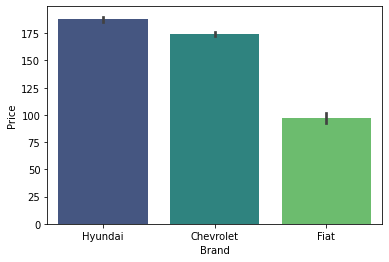

In [219]:
sns.barplot(x=df['Brand'],y= df['Price'], palette='viridis')

<AxesSubplot:xlabel='Engine', ylabel='Price'>

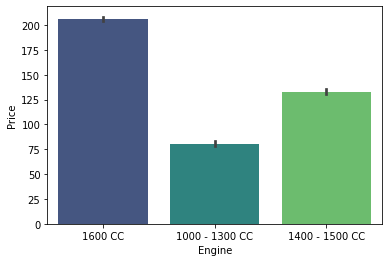

In [220]:
sns.barplot(x=df['Engine'],y= df['Price'], palette='viridis')

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

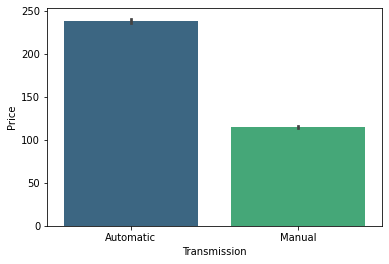

In [221]:
sns.barplot(x=df['Transmission'],y= df['Price'], palette='viridis')

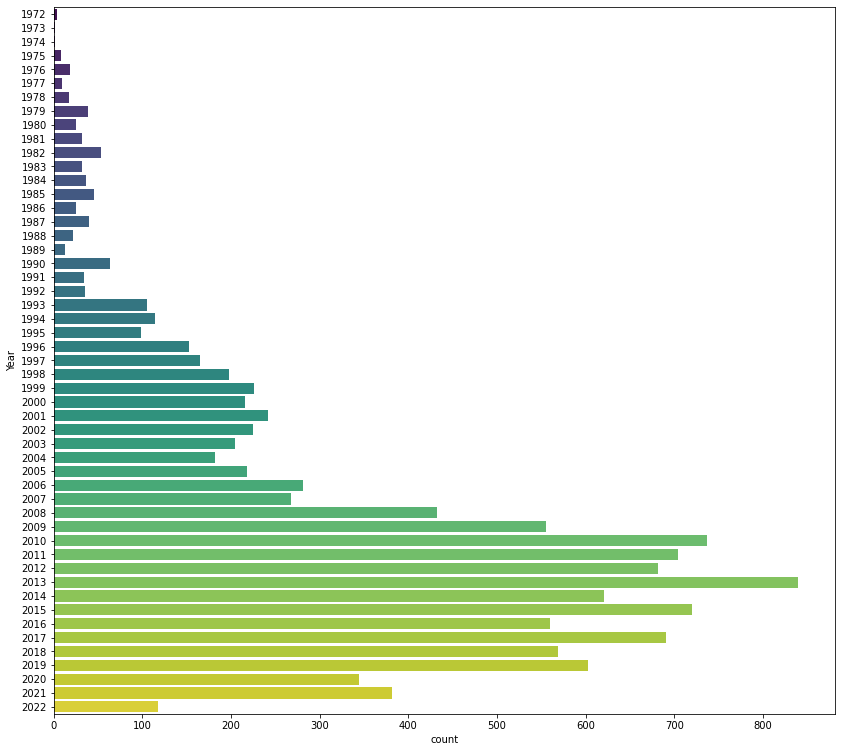

In [222]:
plt.figure(figsize=(14,13))
ax = sns.countplot(y = df["Year"] , palette='viridis');

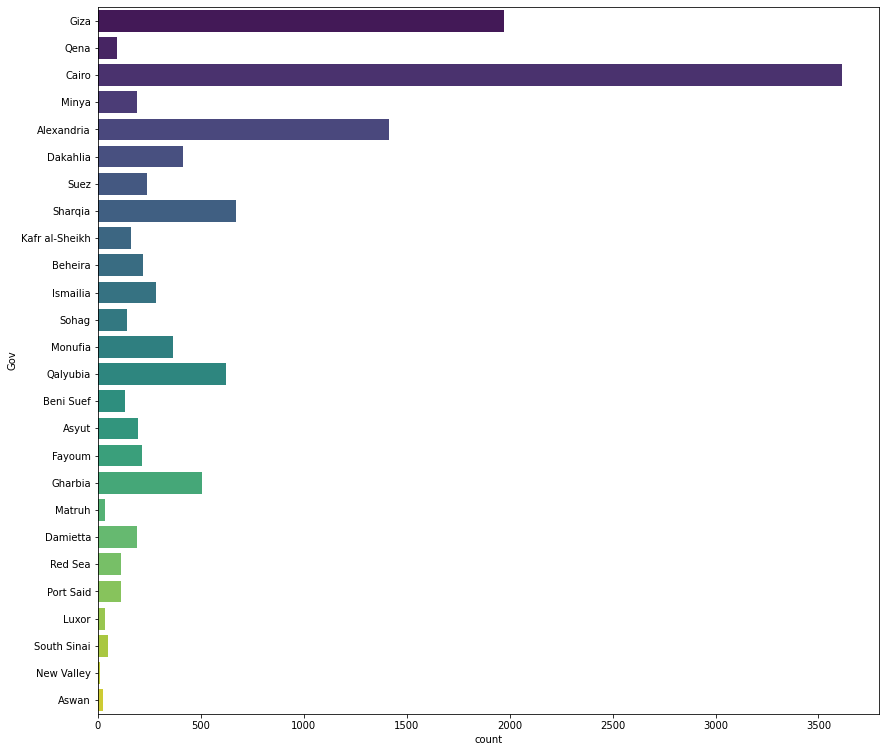

In [223]:
plt.figure(figsize=(14,13))
ax = sns.countplot(y = df["Gov"] , palette='viridis');


In [224]:
input_data = {}
input_data = { 'Brand' :'Hyundai',
              "Model" :'Accent',
              "Body" :'Sedan', 
              "Color" : 'Gold', 
              "Year" :[2014],
              "Fuel" :'Benzine', 
              "Kilometers" :'140000 to 159999',
              "Engine":'1600 CC',
              "Transmission" :'Automatic',
              "Gov":'Ismailia'}
x_x = pd.DataFrame.from_dict(input_data)
#input_data_reshaped = input_data.reshape(1,-1)
#prediction1 = rf.predict(input_data_reshaped)
#print(prediction1)

In [225]:
x_x = encoder.transform(x_x)

In [226]:
x_x[numerical_columns] = Scaler.transform(x_x[numerical_columns])

In [227]:
x_train.columns

Index(['Brand_0', 'Brand_1', 'Model_0', 'Model_1', 'Model_2', 'Model_3',
       'Model_4', 'Body_0', 'Body_1', 'Color_0', 'Color_1', 'Color_2',
       'Color_3', 'Year', 'Fuel_0', 'Fuel_1', 'Kilometers_0', 'Kilometers_1',
       'Kilometers_2', 'Kilometers_3', 'Kilometers_4', 'Engine_0', 'Engine_1',
       'Transmission_0', 'Transmission_1', 'Gov_0', 'Gov_1', 'Gov_2', 'Gov_3',
       'Gov_4'],
      dtype='object')

In [228]:
prediction1 = lr.predict(x_x)

In [229]:
prediction1

array([[265.69098444]])

# Saving the trained model

In [230]:
import pickle

In [231]:
filename = 'trained_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [232]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [233]:
filename = 'trained_model_xgboost.sav'
pickle.dump(xgb_reg, open(filename, 'wb'))

In [234]:
loaded_model = pickle.load(open('trained_model_xgboost.sav','rb'))

In [235]:
import pandas_profiling as pp

In [236]:
profile = pp.ProfileReport(df)
profile.to_file("outbut.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]